<h1><center>Battle of Neighborhood - Analysis of Crime statistics of City of Toronto and effect of neighborhood on the crime rate

Introduction

In this project we will analysing the crime statistics in toronto which is published in http://data.torontopolice.on.ca/datasets/mci-2014-to-2019/data. This study tries to find out the correlation between a busy neighborhood and crime rate. This study will definately help police or the native citizens to devise a strategy to ward off claims which we will explore in the conclusion section. 

The following steps will be followed in the process. 

1. Import the .csv file from Toronto police website
2. Convert the .csv file and convert into the pandas dataframe
3. Filter out required columns and cleanse the data
4. Perform data visualization of the data
5. Get the latitudes and longitudes from the data and map it using the folium map library
6. Plot the maps of the crimes on the city of Toronto based on the divisions/Hood
7. Get 100 venues within the radius of 500 meteres of the latitude and longitude of neighborhood using Four Square API
9. Extract the API data from foursquare
10. Map the count of the Venues on the Hood ID's
11. Cluster the mapped data using K-means Algorithm
12. Use Elbow method to get optimum number of Clusters and again perform Clustering
13. Map the Cluster IDs to Host IDs
14. Perform Analysis for Correlation between "Number of Venues" to "Total Number of Crimes"
15. Conclusion about the Correlation Analysis results.


## 1. Importing all the required libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner


import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy # library to handle the Gejson files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

## 2. Downloading the dataset and converting into a pandas dataframe

Geojson files are very difficult to convert into a dataframe because of more than 20000 rows of data and limited computer capabilities. As there are many columns in the the .csv file got from the Police of toronto website, only few columns required for analysis is chosen and those are put into a list named "ColumnNames".

In [3]:
#Importing the data of toronto city police 

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c59c7acfb8b140e496bd52fd14f09a38 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='84-Aw4oRtKV3fNXCPguBJkL1bTe-Z5bcIEHMKNHQNmyw',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c59c7acfb8b140e496bd52fd14f09a38.get_object(Bucket='courseracapstonebattleofneighbour-donotdelete-pr-cetxyt0gcri34p',Key='MCI_2014_to_2019_FULL.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()

print('Data downloaded!')

Data downloaded!


In [4]:
#To select the necessary entires of the .csv file.
ColumnNames = ['premisetype','occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI','Division','Hood_ID','Neighbourhood','Long','Lat']


In [5]:
#Relavent data has been put into a dataframe named "TorontoCrimeData"

TorontoCrimeData = df_data_0[ColumnNames]

TorontoCrimeData.head()

,premisetype,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
0,House,2014.0,February,27.0,58.0,Thursday,16,Theft Over,D53,101,Forest Hill South (101),-79.417687,43.700561
1,Apartment,2014.0,April,1.0,91.0,Tuesday,16,Assault,D41,121,Oakridge (121),-79.278397,43.705772
2,Apartment,2014.0,April,1.0,91.0,Tuesday,16,Assault,D41,121,Oakridge (121),-79.278397,43.705772
3,Apartment,2014.0,April,1.0,91.0,Tuesday,16,Break and Enter,D41,121,Oakridge (121),-79.278397,43.705772
4,House,2014.0,April,1.0,91.0,Tuesday,12,Theft Over,D32,34,Bathurst Manor (34),-79.460182,43.765781


In [5]:
#Gives the dataframe size.

TorontoCrimeData.shape

(206435, 13)

## 3. Data Wrangling

In [6]:
#To verify the types of data in the dataframe

TorontoCrimeData.dtypes

premisetype             object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Division                object
Hood_ID                  int64
Neighbourhood           object
Long                   float64
Lat                    float64
dtype: object

In [7]:
#To find how many values are missing in the data set.

missingdata = TorontoCrimeData.isnull()

for column in missingdata.columns.values.tolist():
    
    print(missingdata[column].value_counts())

False    206435
Name: premisetype, dtype: int64
False    206376
True         59
Name: occurrenceyear, dtype: int64
False    206376
True         59
Name: occurrencemonth, dtype: int64
False    206376
True         59
Name: occurrenceday, dtype: int64
False    206376
True         59
Name: occurrencedayofyear, dtype: int64
False    206376
True         59
Name: occurrencedayofweek, dtype: int64
False    206435
Name: occurrencehour, dtype: int64
False    206435
Name: MCI, dtype: int64
False    206435
Name: Division, dtype: int64
False    206435
Name: Hood_ID, dtype: int64
False    206435
Name: Neighbourhood, dtype: int64
False    206435
Name: Long, dtype: int64
False    206435
Name: Lat, dtype: int64


Above result shows us that there are missing datas in Occurence year, Occurence month,Occurence day, and Occurence day of year and all are string data and comparitively the missing data is very less compared to the availabe data. Hence those will be ignored.


In [6]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

### Crime Trend from 2014-2019

In [106]:
#YearlyCrime = pd.DataFrame(data = TorontoCrimeData["occurrenceyear"].value_counts(), columns = Years)

YearlyCrime = TorontoCrimeData["occurrenceyear"].value_counts()

YearlyCrime.to_frame()

YearlyCrime.index = YearlyCrime.index.astype(int)

YearlyCrimedata = YearlyCrime.loc[range(2014,2020)]

YearlyCrimedata

2014    31638
2015    32316
2016    32809
2017    34561
2018    36323
2019    37674
Name: occurrenceyear, dtype: int64

Text(0.5, 1.0, 'Trend of Crimes from year 2014 - 2019')

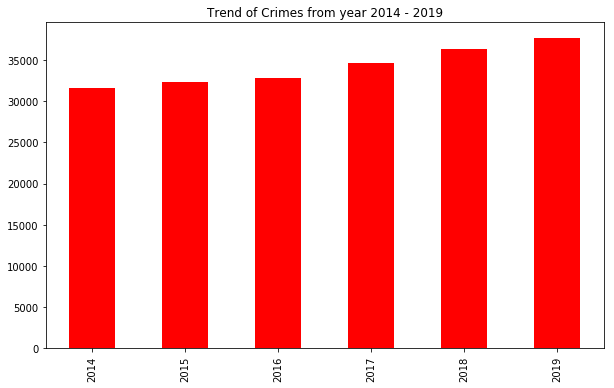

In [155]:
YearlyCrimedata.plot(kind = 'bar', color = 'r', figsize=(10, 6))

plt.title("Trend of Crimes from year 2014 - 2019")


### Determine the crimes at locations.

In [9]:
# Seperate data frame will be created to find out the number of occurances at premises

PremiseCrime = TorontoCrimeData["premisetype"].value_counts()

In [10]:
PremiseCrime.head()

Outside       54253
Apartment     49996
Commercial    41081
House         37927
Other         23178
Name: premisetype, dtype: int64

Text(0.5, 1.0, 'Location of the crimes')

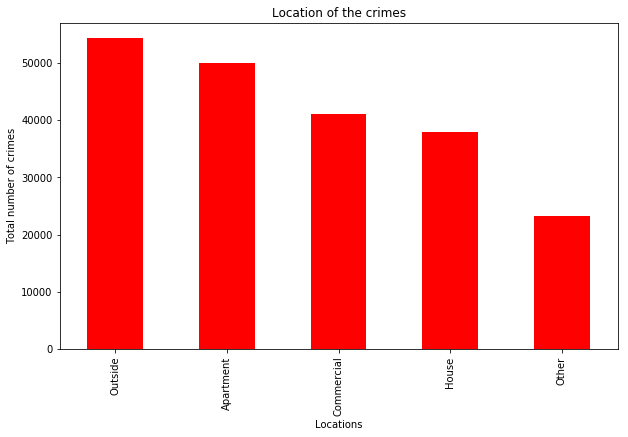

In [79]:
PremiseCrime.plot(kind = 'bar', color = 'r', figsize=(10, 6))

plt.xlabel("Locations")
plt.ylabel("Total number of crimes")
plt.title("Location of the crimes")

### Determine the highest and lowest Type of Crimes

In [12]:
TypeCrime = TorontoCrimeData["MCI"].value_counts()

Text(0.5, 1.0, 'Percentages of crimes from 2014 - 2019')

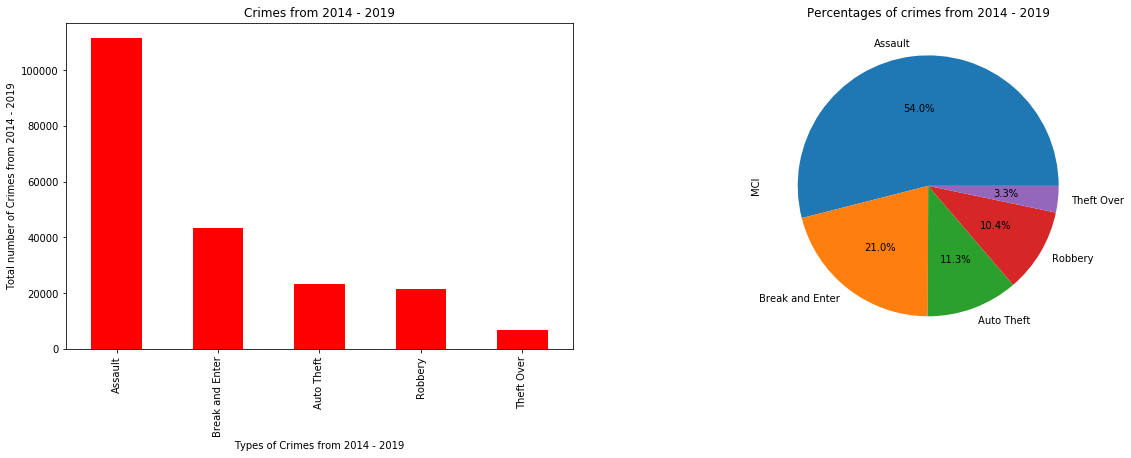

In [13]:
fig = plt.figure() #create figure

ax0 = fig.add_subplot(1,2,1) # This is for the bar chart
ax1 = fig.add_subplot(1,2,2) # This subplot is for pie chart.

#Subplot 1 

TypeCrime.plot(kind = "bar", color = 'r', figsize = (20,6), ax = ax0)
ax0.set_title("Crimes from 2014 - 2019")
ax0.set_xlabel("Types of Crimes from 2014 - 2019")
ax0.set_ylabel("Total number of Crimes from 2014 - 2019")


TypeCrime.plot(kind = "pie", figsize = (20,6), autopct = '%1.1f%%', ax = ax1)
ax1.set_title("Percentages of crimes from 2014 - 2019")


From the graph above we can find that "Assault" is the major type of crime in city of Toronto which amounts to 54% of the total crimes and "Theft over" is least about 3.3% from that of the total crimes

### Crime distribution as per week.

Daily and Monthly distribution is plotted so if any of the pattern exists in the crime.

In [7]:
df_MCI = pd.get_dummies(TorontoCrimeData["MCI"])

df_day = pd.concat([TorontoCrimeData["occurrencedayofweek"], df_MCI],axis = 1)

#df_day.head()

df_day.dropna(subset = ["occurrencedayofweek"], axis = 0, inplace = True)

df_day.reset_index(drop = True , inplace = True)


#df_day.sort_values(["occurrencedayofweek"], axis = 0, inplace = True)

#weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # List to sort weekdays in the "Monday-Sunday" order

#df_day.occurrencedayofweek = pd.Categorical(df_day.occurrencedayofweek,categories=weekdays)

#df_day = df_day.sort_values('occurrencedayofweek')

days = df_day.groupby(["occurrencedayofweek"],as_index = True).sum()


# Percentage increase of Assault on Sunday.

Assault_Sunday = (days["Assault"].astype(int).max()-days["Assault"].astype(int).min())/(days["Assault"].astype(int).min()) * 100

print("Increase of Assault on Sunday is ", round(Assault_Sunday,2), "%")

#Percentage decrease of Break and Enter on Sunday 

BE_Sunday = (days["Break and Enter"].astype(int).max()-days["Break and Enter"].astype(int).min())/(days["Break and Enter"].astype(int).min()) * 100

print("Decrease of Break and Enter on Sunday is ", round(BE_Sunday,2), "%")



Increase of Assault on Sunday is  21.71 %
Decrease of Break and Enter on Sunday is  40.72 %


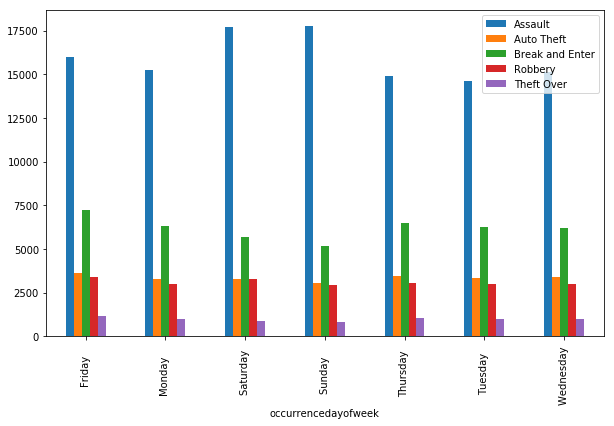

In [15]:
days.plot(kind = "bar", figsize = (10,6))

From the above graph we can see that Assault which is most committed crime in Toronto is highest on Weekends approximately 22% particularly on Sundays. And the second biggest crime which is "Break and Enter" decreases on weekends by approximately 40%.

### Crime distribution as per time of the day.

In [8]:
HourlyCrime = pd.concat([TorontoCrimeData["occurrencehour"], df_MCI], axis = 1)

HourlyCrime['occurrencehour'].replace(0,24,inplace = True)

HourlyCrime = HourlyCrime.groupby(['occurrencehour'], as_index = True).sum(axis = 0)

HourlyCrime.head()

#print(HourlyCrime.columns.tolist())
#Col = HourlyCrime.Columns
#HourlyCrime.tail()

#To test number of entries in Assault in the main dataframe and derived dataframe.

#Testframe = TorontoCrimeData["MCI"].value_counts()

#print(Testframe, "test frame data " , HourlyCrime["Assault"].sum(axis = 0))

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
occurrencehour,,,,,
1,4933,748,1780,1134,135
2,5325,573,1833,988,109
3,3398,436,2038,803,91
4,2087,362,2000,500,81
5,1495,383,1566,298,65


Text(0, 0.5, 'Total number of Crimes')

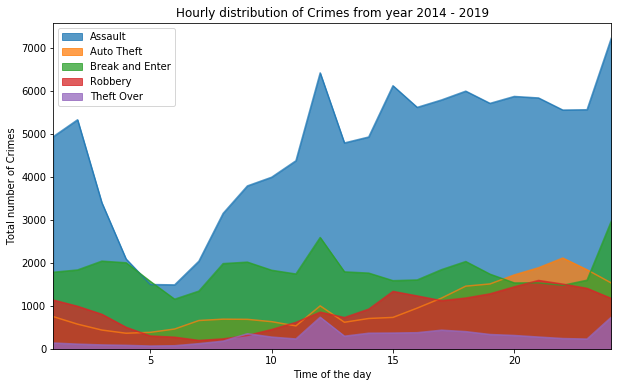

In [17]:
#plt.plot(HourlyCrime["occurrencehour"], HourlyCrime["Assault"])

#count, bin_edges = np.histogram(HourlyCrime, 12)

HourlyCrime.plot(kind = 'area', 
                 alpha = 0.75, 
                 stacked = False,  
                 figsize = (10,6))
plt.title("Hourly distribution of Crimes from year 2014 - 2019")
plt.xlabel("Time of the day")
plt.ylabel("Total number of Crimes")

From the above graph we can see that all the crimes occurances spike up in the afternoon and gradually increases till the mid night but drastically reduces early morning.

### Crime distribution as per Divisions and Hood ID 

Toronto police have divided the city into 53 divisions and 140 Hoods, and the crime statistics are for Assualt will be mapped using folium map.

In [9]:
HoodCrimeData = pd.concat([TorontoCrimeData["Hood_ID"],df_MCI], axis = 1)

HoodCrimeData = HoodCrimeData.groupby(['Hood_ID'] , as_index = False).sum()

T_Hood_LaLong = TorontoCrimeData[["Hood_ID", "Lat", "Long"]]# Subset consisting of Latitude and Longitude data for identified hoods

#Since lot of Hoods have different values of latitudes and Longitudes, mean of the latitude and longitude values are taken as centriod values as a very crude approximation

T_Hood_LaLong = T_Hood_LaLong.groupby(["Hood_ID"], as_index = False).mean()

HoodCrime_lat_Long = pd.merge(HoodCrimeData,
                              T_Hood_LaLong,
                              on = 'Hood_ID',
                              how = 'inner'
                             )#Dataset consisting of total sum of catergories of crimes and corresponding latitudes and longitudes achieved using merge command in pandas


print(HoodCrime_lat_Long.shape)
HoodCrime_lat_Long.head()

(140, 8)


,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Lat,Long
0,1,1811.0,2200.0,827.0,551.0,313.0,43.721487,-79.597169
1,2,1535.0,374.0,193.0,462.0,27.0,43.745418,-79.587672
2,3,322.0,152.0,114.0,90.0,14.0,43.738422,-79.566848
3,4,412.0,172.0,95.0,121.0,10.0,43.721058,-79.563743
4,5,327.0,113.0,63.0,81.0,9.0,43.721320,-79.550943


In [10]:
# Toronto latitude and longitude values
latitude = 43.651070
longitude = -79.347015

In [11]:
# create map and display it
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)



Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the Toronto_map.

In [12]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(HoodCrime_lat_Long.Lat, HoodCrime_lat_Long.Long):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Toronto_map.add_child(incidents)

###  Explore Neighborhoods using Four Square API

#### Let's create a function to explore all the neighborhoods

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'MSXUR1NWCONJARO2ID4ZUSQPYAFPXJDNYBVP4ORZIJF4ZRUO' # your Foursquare ID
CLIENT_SECRET = 'EAMJFRILML1MEPFW55IQZAHR2FFB3I5DIGBEXNNOULAGWFEF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MSXUR1NWCONJARO2ID4ZUSQPYAFPXJDNYBVP4ORZIJF4ZRUO
CLIENT_SECRET:EAMJFRILML1MEPFW55IQZAHR2FFB3I5DIGBEXNNOULAGWFEF


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    LIMIT =100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
#Loop to find the neighborhood near all the identified Hood ids

 
Toronto_venues = getNearbyVenues(names=HoodCrime_lat_Long['Hood_ID'],
                                 latitudes=HoodCrime_lat_Long['Lat'],
                                 longitudes=HoodCrime_lat_Long['Long']
                                  )




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140


In [16]:
# check the size of the resulting dataframe

print(Toronto_venues.shape)
Toronto_venues[(Toronto_venues['Neighborhood'] == 7)] # testing the value seemed to be missing in the dataset

(2497, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [17]:
T_Count = Toronto_venues.groupby('Neighborhood', as_index = False).count() #data frame storing counts of venues for given hood

T_Count.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,14,14,14,14,14,14
1,2,13,13,13,13,13,13
2,3,11,11,11,11,11,11
3,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5
5,6,4,4,4,4,4,4
6,8,4,4,4,4,4,4
7,9,3,3,3,3,3,3
8,10,2,2,2,2,2,2
9,11,2,2,2,2,2,2


In [18]:
T_Count_sliced = T_Count[['Neighborhood', 'Venue']] #this data frame is used to slice the data set T_Count and extract the count

T_Count_sliced.rename(columns = {'Neighborhood' : 'Hood_ID'}, inplace = True)

T_Count_sliced.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Hood_ID,Venue
0,1,14
1,2,13
2,3,11
3,4,4
4,5,5


### Merging the venue data with Crime data and later application of K-means clustering

In [19]:
Toronto_collab = pd.merge(HoodCrime_lat_Long,
                          T_Count_sliced , 
                          on = 'Hood_ID', 
                          how = 'inner')#Dataset consisting of total sum of catergories of crimes and corresponding latitudes and longitudes and number of venues achieved using merge command in pandas

Toronto_collab.head()

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Lat,Long,Venue
0,1,1811.0,2200.0,827.0,551.0,313.0,43.721487,-79.597169,14
1,2,1535.0,374.0,193.0,462.0,27.0,43.745418,-79.587672,13
2,3,322.0,152.0,114.0,90.0,14.0,43.738422,-79.566848,11
3,4,412.0,172.0,95.0,121.0,10.0,43.721058,-79.563743,4
4,5,327.0,113.0,63.0,81.0,9.0,43.721320,-79.550943,5


## 5. Clustering of Neighborhood

### Applying K-means clustering to examine the effect of  neighborhood on the Crime count

In [20]:
Toronto_collab1 = Toronto_collab[["Hood_ID","Assault","Auto Theft","Break and Enter","Robbery","Theft Over","Venue"]]

Toronto_collab1

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Venue
0,1,1811.0,2200.0,827.0,551.0,313.0,14
1,2,1535.0,374.0,193.0,462.0,27.0,13
2,3,322.0,152.0,114.0,90.0,14.0,11
3,4,412.0,172.0,95.0,121.0,10.0,4
4,5,327.0,113.0,63.0,81.0,9.0,5
5,6,626.0,277.0,208.0,119.0,25.0,4
6,8,189.0,126.0,141.0,34.0,19.0,4
7,9,163.0,138.0,270.0,35.0,28.0,3
8,10,144.0,134.0,181.0,81.0,23.0,2
9,11,324.0,178.0,167.0,93.0,25.0,2


Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [21]:
from sklearn.preprocessing import StandardScaler

X = Toronto_collab1.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 1.29173856e+00,  9.60057490e+00,  2.32110590e+00,
         2.81884367e+00,  4.62635043e+00, -2.12717102e-01],
       [ 9.38218443e-01,  9.83732155e-01, -5.22973668e-01,
         2.18478588e+00, -3.81763075e-01, -2.61502137e-01],
       [-6.15476874e-01, -6.38796126e-02, -8.77362132e-01,
        -4.65433202e-01, -6.09404598e-01, -3.59072207e-01],
       [-5.00198574e-01,  3.04998259e-02, -9.62594801e-01,
        -2.44581612e-01, -6.79448143e-01, -7.00567454e-01],
       [-6.09072524e-01, -2.47919518e-01, -1.10614456e+00,
        -5.29551405e-01, -6.96959030e-01, -6.51782418e-01],
       [-2.26092392e-01,  5.25991878e-01, -4.55684720e-01,
        -2.58830101e-01, -4.16784847e-01, -7.00567454e-01],
       [-7.85832585e-01, -1.86572883e-01, -7.56242024e-01,
        -8.64390913e-01, -5.21850166e-01, -7.00567454e-01],
       [-8.19135205e-01, -1.29945220e-01, -1.77557064e-01,
        -8.57266668e-01, -3.64252188e-01, -7.49352489e-01],
       [-8.43471735e-01, -1.48821107e-01, -5.768

In [22]:
#As there are 5 types of crimes in Toronto, first iteration will be with 5 clusters.

num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[3 4 1 1 1 1 1 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 4 4 1 1 1 4 1 1 1 1 1 4 1
 1 0 1 1 4 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 4 0 1 0 1 0 0 1 4 0 1 2 0 2 2 2 2
 0 0 0 4 0 0 0 1 1 1 1 0 1 1 4 0 4 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 4 1 1
 1 4 1 4 4 1 1 1 4 1 4 4 4 1 4 4 4 1 1 1 4 4 4 1 1]


### Finding the right number of cluster with Elbow method 

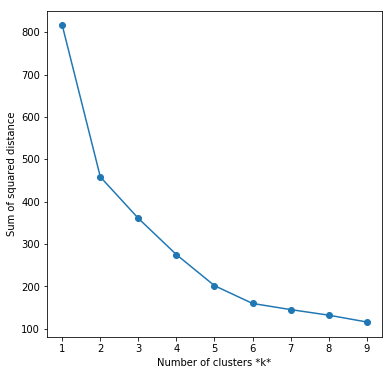

In [23]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(cluster_dataset)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [24]:
#With the above Elbow graph we can deduce that best k = 2 as after k =2, the Sum of squared distance drastically reduces.

num_clusters = 2

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


Let's create a new dataframe that includes the cluster for each hood ID's.

In [25]:
Toronto_collab.rename(columns = {'Cluster_Labels' : 'Cluster Labels'}, inplace = True)


In [26]:
Toronto_collab["Total Crimes"] = Toronto_collab[["Hood_ID","Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]].sum(axis = 1)



In [29]:
 #Dataframe is defined as cluster labels are added to the data set. Older data set is used in many other case and adding a new column might affect other analysis.
    
Toronto_collab2 = Toronto_collab

Toronto_collab2.insert(10, 'Cluster Labels', labels)

Toronto_collab2.head()

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Lat,Long,Venue,Total Crimes,Cluster Labels
0,1,1811.0,2200.0,827.0,551.0,313.0,43.721487,-79.597169,14,5703.0,1
1,2,1535.0,374.0,193.0,462.0,27.0,43.745418,-79.587672,13,2593.0,0
2,3,322.0,152.0,114.0,90.0,14.0,43.738422,-79.566848,11,695.0,0
3,4,412.0,172.0,95.0,121.0,10.0,43.721058,-79.563743,4,814.0,0
4,5,327.0,113.0,63.0,81.0,9.0,43.721320,-79.550943,5,598.0,0


As seen from the above table, whole data set is divided into two clusters namely "1" and "0". Below we will examine the cluster

## 6. Results and Conclusion 

The results of the observation will be plotted below in the form of "box plot" and "bar graph"

Text(0, 0.5, 'Total number of Crimes from 2014 - 2019')

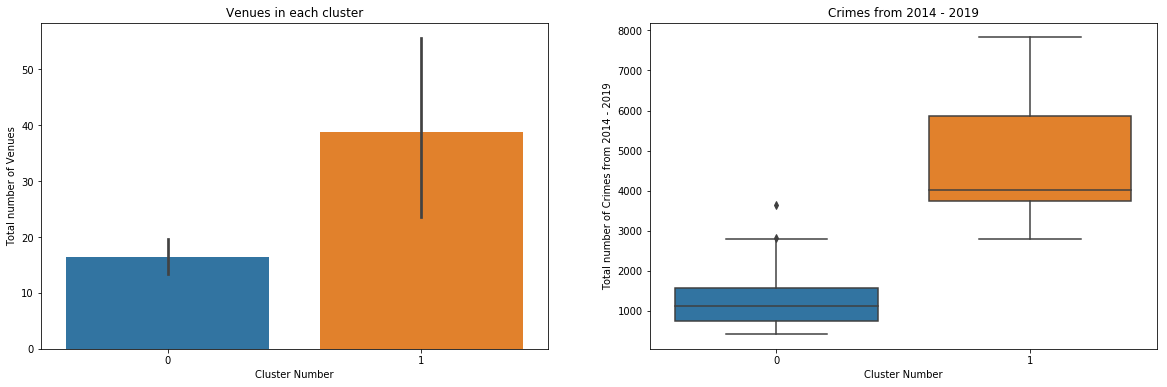

In [30]:
import seaborn as sns

#T_plot = Toronto_collab[[""]]

fig = plt.figure(figsize=(20, 6)) #create figure


ax0 = fig.add_subplot(1,2,1) # This is for the bar chart
ax1 = fig.add_subplot(1,2,2) # This subplot is for pie chart.

#Subplot 1 

sns.barplot(x = "Cluster Labels", y = "Venue", data = Toronto_collab2 , ax = ax0)
ax0.set_title("Venues in each cluster")
ax0.set_xlabel("Cluster Number")
ax0.set_ylabel("Total number of Venues")

#Subplot 2

sns.boxplot(x = "Cluster Labels", y = "Total Crimes", data = Toronto_collab2 , ax = ax1)
ax1.set_title("Crimes from 2014 - 2019")
ax1.set_xlabel("Cluster Number")
ax1.set_ylabel("Total number of Crimes from 2014 - 2019")



From the above graph it can be easily shown that as the number of venues increases the Crime rate or the total number of crimes increases. 

### Regression Plot

Text(0, 0.5, 'Total Number of Crimes')

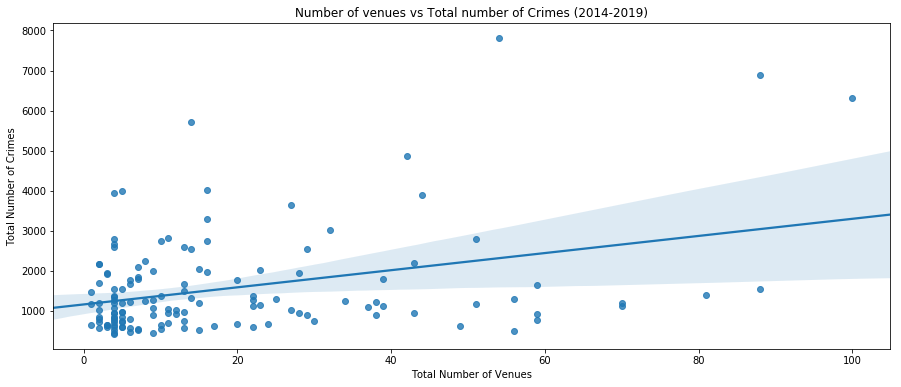

In [31]:
fig = plt.figure(figsize=(15, 6)) #create figure

sns.regplot(x = "Venue" , y = "Total Crimes", data = Toronto_collab2)

plt.title("Number of venues vs Total number of Crimes (2014-2019)")
plt.xlabel("Total Number of Venues")
plt.ylabel("Total Number of Crimes")

### Pearson Correlation and P-value determination of "Number of Venues" to "Total number of Crimes"


In [32]:
#import Library

from scipy import stats

pearson_coef, p_value = stats.pearsonr(Toronto_collab2["Venue"], Toronto_collab2["Total Crimes"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 


The Pearson Correlation Coefficient is 0.3503682188715298  with a P-value of P = 2.8948696915466882e-05


### Conclusion

1. The bar chart and box plot clearly shows that the cluster where the number of venues are more, the crimes are also significantly higher. 
2. Regression plot also shows a positive correlation which indicates that more the venues more are the crimes, it can be supported by the Pearson's coefficient and p value.

## 7.  Choropleth map depicting the Crime Zones

To generate a Chorpleth map, boundary files from Toronto Police is downloaded as a Json file. But when the json file is  examined the format of "Hood_ID" is different than the one our data set. And format for "Hood_ID" in Json file as leading zeros and in the data frame the leading zero's are not there. Both formats are made same as we will be referring it our "Hood_ID" data in Choropleth map

In [36]:
#Adding leading zeros to Hood_ID data 

Toronto_collab2["Hood_ID"] = Toronto_collab2["Hood_ID"].apply(lambda x: '{0:0>3}'.format(x)) 
Toronto_collab2.head()

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Lat,Long,Venue,Total Crimes,Cluster Labels
0,001,1811.0,2200.0,827.0,551.0,313.0,43.721487,-79.597169,14,5703.0,1
1,002,1535.0,374.0,193.0,462.0,27.0,43.745418,-79.587672,13,2593.0,0
2,003,322.0,152.0,114.0,90.0,14.0,43.738422,-79.566848,11,695.0,0
3,004,412.0,172.0,95.0,121.0,10.0,43.721058,-79.563743,4,814.0,0
4,005,327.0,113.0,63.0,81.0,9.0,43.721320,-79.550943,5,598.0,0


In [34]:
# download countries geojson file
!wget --quiet https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.geojson -O Toronto_crime.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [37]:
Toronto_geo = r'Toronto_crime.json' # geojson file

# create a plain world map
Toronto_map_ch = folium.Map(location=[latitude, longitude], zoom_start= 12, tiles='Mapbox Bright')

In [38]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
Toronto_map_ch.choropleth(
    geo_data=Toronto_geo,
    data=Toronto_collab,
    columns=['Hood_ID', 'Total Crimes'],
    key_on='feature.properties.Hood_ID',
    fill_color='PuRd', 
    fill_opacity=1, 
    line_opacity=0.2,
    legend_name='Total number of crimes'
)

# display map
Toronto_map_ch